In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("new_insurance_data (1).csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
# import statsmodels.api as sm
# insurance = sm.add_constant(insurance)

In [5]:
insurance.shape

(1338, 13)

In [6]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# 1. Handling null values

In [8]:
col = list(insurance.columns)

In [9]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [10]:
insurance["age"].mode()[0]

18.0

In [11]:
for col_name in col:
    if insurance[col_name].dtypes == 'object':
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mode()[0])
    
    else:
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mean())

In [12]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

# 2. Handling Outliers

In [13]:
#Drawing boxplot for each columns
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

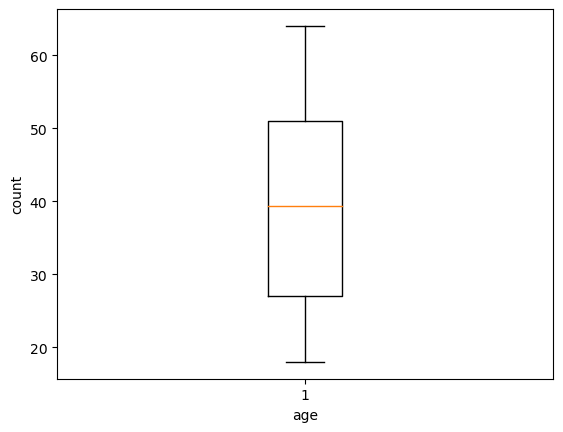

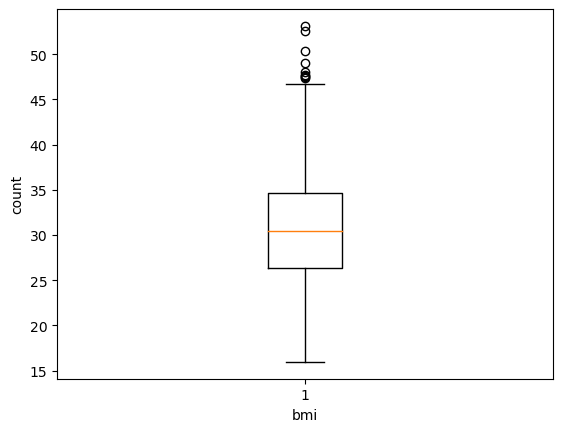

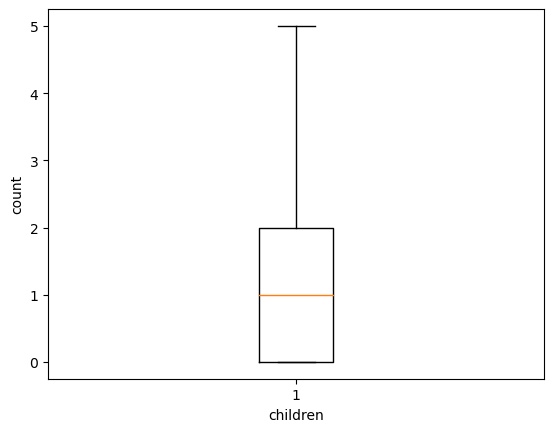

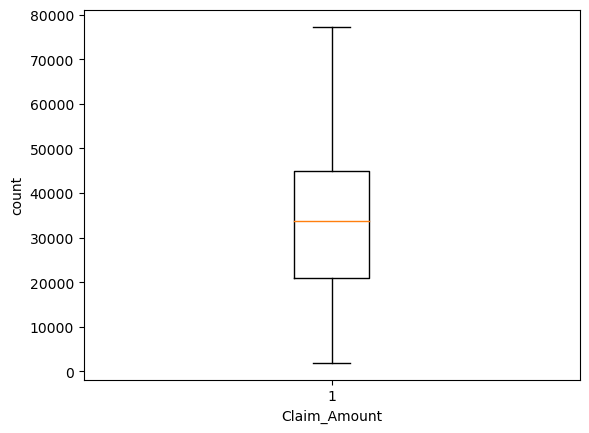

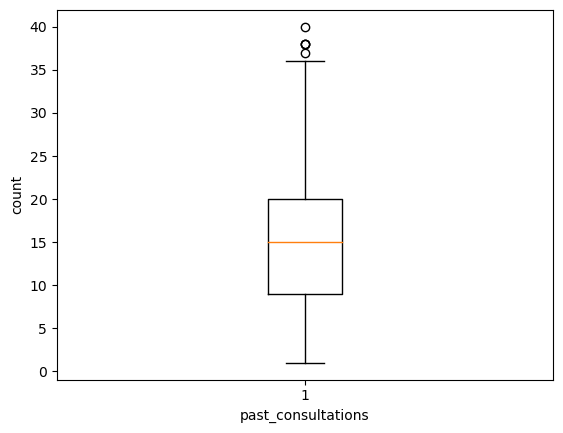

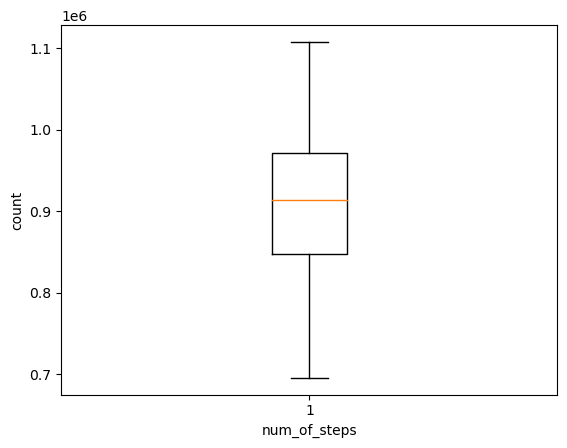

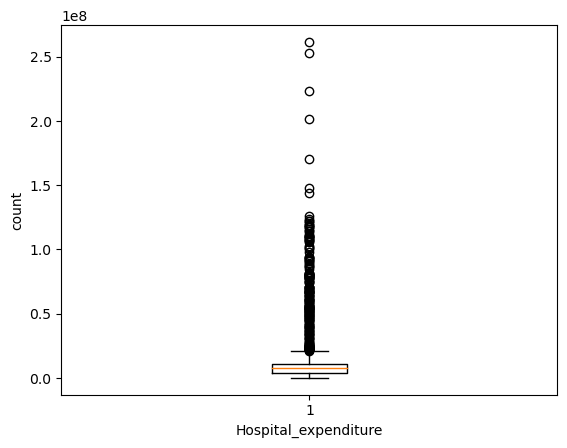

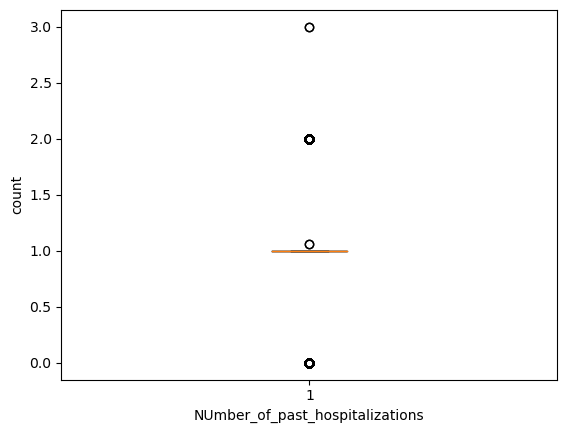

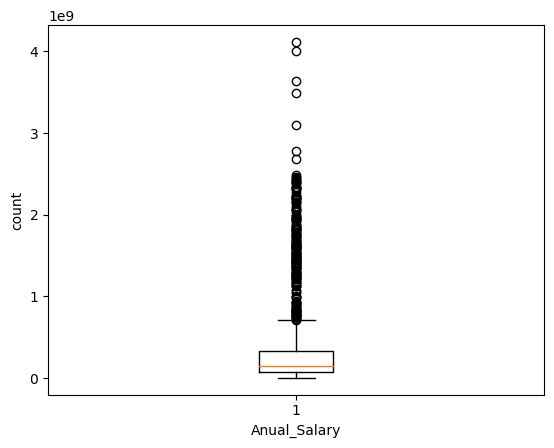

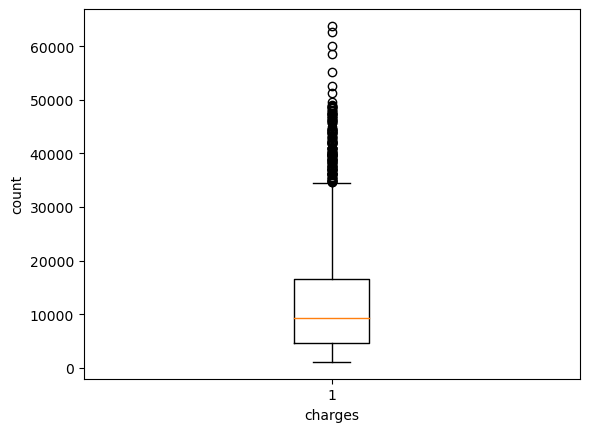

In [14]:
for col_name in col:
    if insurance[col_name].dtypes == 'int64' or insurance[col_name].dtypes=='float64':
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [15]:
#now we are going to handel the outliers
insurance.shape

(1338, 13)

In [16]:
# Q1 = insurance.bmi.quantile(0.25)
# Q3 = insurance.bmi.quantile(0.75)
# IQR = Q3-Q1
# insurance = insurance[(insurance.bmi >=Q1-1.5*IQR) & (insurance.bmi <= Q3+1.5*IQR)]

In [17]:
# Q1 = insurance.past_consultations.quantile(0.25)
# Q3 = insurance.past_consultations.quantile(0.75)
# IQR = Q3-Q1
# insurance = insurance[(insurance.past_consultations >=Q1-1.5*IQR) & (insurance.past_consultations <= Q3+1.5*IQR)]

In [18]:
# Q1 = insurance.Hospital_expenditure.quantile(0.25)
# Q3 = insurance.Hospital_expenditure.quantile(0.75)
# IQR = Q3-Q1
# insurance = insurance[(insurance.Hospital_expenditure >=Q1-1.5*IQR) & (insurance.Hospital_expenditure <= Q3+1.5*IQR)]

In [19]:
# Q1 = insurance.Anual_Salary.quantile(0.25)
# Q3 = insurance.Anual_Salary.quantile(0.75)
# IQR = Q3-Q1
# insurance = insurance[(insurance.Anual_Salary >=Q1-1.5*IQR) & (insurance.Anual_Salary <= Q3+1.5*IQR)]

In [20]:
insurance.shape

(1338, 13)

In [21]:
OCols = ["bmi","past_consultations","Hospital_expenditure","Anual_Salary" ]

In [22]:
for cols in OCols:
    Q1 = insurance[cols].quantile(0.25)
    Q3 = insurance[cols].quantile(0.75)
    IQR = Q3-Q1
    insurance = insurance[(insurance[cols] > Q1-1.5*IQR) & (insurance[cols] < Q3+1.5*IQR)]


In [23]:
insurance.shape

(1030, 13)

# 3.Multicolinearity

In [24]:
# it is a concept os statistics
# here saveral independent columns are correlated in thr model
# we never calculate colinerity for dependent variables
# this multicolinearity is going to increase the efficiency of my model


In [25]:
#note -- correlation -- > between each independent variable with dependent variable.
# multicolinearity -- > between each independent variable vs other independent variable
# to check the amount multicolinearity we will be using one module called as "variance_inflation_factor"

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)

In [27]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [28]:
X = insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   bmi                              1030 non-null   float64
 2   children                         1030 non-null   float64
 3   Claim_Amount                     1030 non-null   float64
 4   past_consultations               1030 non-null   float64
 5   num_of_steps                     1030 non-null   float64
 6   Hospital_expenditure             1030 non-null   float64
 7   NUmber_of_past_hospitalizations  1030 non-null   float64
 8   Anual_Salary                     1030 non-null   float64
dtypes: float64(9)
memory usage: 80.5 KB


In [30]:
for i in range(len(X.columns)):
    print(i)
X.columns

0
1
2
3
4
5
6
7
8


Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

In [31]:
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          features        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [32]:
insurance = insurance.drop(['num_of_steps'], axis =1)

In [33]:
#we will again calculate multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)


X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          features        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [34]:
insurance = insurance.drop(['age'], axis =1)

In [35]:
#we will again calculate multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)


X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          features        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [36]:
insurance = insurance.drop(['bmi'], axis =1)

In [37]:
#we will again calculate multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)


X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                          features       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [38]:
insurance = insurance.drop(['NUmber_of_past_hospitalizations'], axis =1)

In [39]:
#we will again calculate multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if((insurance[col].dtype!='object') & (col!='charges')):
        col_list.append(col)


X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

               features       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


# Machine learining algorithm part

In [40]:
insurance

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4.720921e+06,5.578497e+07,southeast,1121.87390
1,male,0.0,no,39053.67437,7.0,4.329832e+06,1.370089e+07,southeast,1131.50660
2,male,0.0,no,39023.62759,19.0,6.884861e+06,7.352311e+07,southeast,1135.94070
3,male,0.0,no,28185.39332,11.0,4.274774e+06,7.581968e+07,southeast,1136.39940
4,male,0.0,no,14697.85941,16.0,3.787294e+06,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...
1046,female,1.0,yes,51168.25474,23.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,male,3.0,yes,46619.40230,27.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,male,0.0,yes,24382.58056,21.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,female,2.0,yes,21596.43846,10.0,1.083030e+07,3.696849e+08,northeast,19798.05455


In [41]:
x = insurance.loc[:, ['children', 'Claim_Amount', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary' ]]
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [42]:
y = insurance.iloc[:, -1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [43]:
# we have to import mechine laerning module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [45]:
# now we are going to create our first model

In [46]:
model1 = LinearRegression() #this is untrained model

In [47]:
# now we are going to train our model
model1.fit(x_train, y_train)

LinearRegression()

In [48]:
# now we are going to test our model

In [49]:
y_pred = model1.predict(x_test)

In [50]:
# note --> y_pred is the predicted value
#    --> y_train s the actual output

In [51]:
# to check the accuracy of the linear regression model we have to check the r2_score

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test, y_pred)

0.8436003409638112